In [1]:
import os
import fnmatch
import pandas as pd
from datetime import *
import matplotlib.pyplot as plt
import pandas as pd
which_pc = 'Maxcell-HomePC'

In [2]:
import sys
sys.path.append("C:\\Users\\"+which_pc+"\\QishiQR")
import Utils.MajorContract_Offsets
import importlib

#importlib.reload(Utils.MajorContract_split)
from Utils.MajorContract_Offsets import *


import Backtesting.Vectorized.lm_validation
importlib.reload(Backtesting.Vectorized.lm_validation)
from Backtesting.Vectorized.lm_validation import LmValidation

import Backtesting.Vectorized.Strategy
importlib.reload(Backtesting.Vectorized.Strategy)
from Backtesting.Vectorized.Strategy import *

# Zn data and PTBs

In [ ]:
prod = 'zn'
freq_set =[5, 10, 15, 30]
pct_th_bps_set = [10]

for pct_th_bps in pct_th_bps_set:
    for freq in freq_set:
        print('pct_th='+str(pct_th_bps)+'bps, freq = '+str(freq)+'min')
        pct_th = pct_th_bps *0.0001
        step = freq/5
        offset = [0.1+i*step for i in range(5)]
        zn_train, zn_test, zn_probability_table = MajorContracts(symbol=prod, split_time = '2016-7-1', topdir=r'C:\\Users\\' + which_pc+ '\\QishiQR\\Data',
                                                                 maturity={
                                                                     '1603':['2016-1-1','2016-2-29'],
                                                                     '1604':['2016-2-1','2016-3-31'],
                                                                     '1605':['2016-3-1','2016-4-30'],
                                                                     '1606':['2016-4-1','2016-5-31'],
                                                                     '1607':['2016-5-1','2016-6-30'],
                                                                     '1608':['2016-6-1','2016-7-31'],
                                                                     '1609':['2016-7-1','2016-8-31'],
                                                                     '1610':['2016-8-1','2016-9-30'],
                                                                     '1611':['2016-9-1','2016-10-31'],
                                                                     '1612':['2016-10-1','2016-11-30'],
                                                                     '1701':['2016-11-1','2016-12-31'],
                                                                     '1702':['2016-12-1','2017-1-31']
                                                                          },
                                                                 transitions = {
                                                                     '1603':'2016-2-1', 
                                                                     '1604':'2016-3-1',
                                                                     '1605':'2016-4-1',
                                                                     '1606':'2016-5-1',
                                                                     '1607':'2016-6-1',
                                                                     '1608':'2016-7-1',
                                                                     '1609':'2016-8-1',
                                                                     '1610':'2016-9-1',
                                                                     '1611':'2016-10-1',
                                                                     '1612':'2016-11-1',
                                                                     '1701':'2016-12-1',
                                                                     '1702':'2017-1-1'
                                                                 },
                                                                 freq = freq, offset = offset, threshold = pct_th, price = 'MidPrice').create_major_overlap()

        for offset in zn_test.keys():
            #zn_test[offset].to_csv(r'../../Output/'+str(pct_th_bps)+'bps/'+'zn/'+str(freq)+'min/'+'zn_major_' + str(freq) + '_' + offset + '.csv')
            for contract in ['1603', '1604', '1605', '1606', '1607', '1608']:
                zn_probability_table[contract].to_csv(r'../../Strategy/'+str(pct_th_bps)+'bps/zn_'+ contract + '_major_strategy_' + str(freq) + '_' + offset + '.csv', index=False)


# Bu data and PTBs

In [3]:
prod = 'bu'
freq_set =[5, 10, 15, 30]
pct_th_bps_set = [0, 5, 10]

for pct_th_bps in pct_th_bps_set:
    for freq in freq_set:
        print('pct_th='+str(pct_th_bps)+'bps, freq = '+str(freq)+'min')
        pct_th = pct_th_bps *0.0001
        step = freq/5
        offset = [0.1+i*step for i in range(5)]
        bu_train, bu_test, bu_probability_table = MajorContracts(symbol=prod, split_time = '2016-7-1', topdir=r'C:\\Users\\' + which_pc+ '\\QishiQR\\Data',
                                                                 maturity={
                                                                     '1606':['2015-11-1','2016-5-1'], 
                                                                     '1609':['2016-2-1','2016-8-1'], 
                                                                     '1612':['2016-6-1','2016-11-15'],
                                                                     '1706':['2016-10-15','2017-1-31']
                                                                          },
                                                                 transitions = {
                                                                     '1606':'2016-3-1', 
                                                                     '1609':'2016-7-1', 
                                                                     '1612':'2016-11-1', 
                                                                     '1706':'2017-1-1'
                                                                 },
                                                                 freq = freq, offset = offset, threshold = pct_th, price = 'MidPrice').create_major_overlap()

        for offset in bu_test.keys():
            bu_test[offset].to_csv(r'../../Output/'+str(pct_th_bps)+'bps/'+'bu/'+str(freq)+'min/'+'bu_major_' + str(freq) + '_' + offset + '.csv')
            for contract in ['1606', '1609', '1612']:
                bu_probability_table[contract].to_csv(r'../../Strategy/'+str(pct_th_bps)+'bps/bu_'+ contract + '_major_strategy_' + str(freq) + '_' + offset + '.csv', index=False)



pct_th=0bps, freq = 5min
bu1606 C:\\Users\\Maxcell-HomePC\QishiQR\Data/bu
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
bu1609 C:\\Users\\Maxcell-HomePC\QishiQR\Data/bu
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160301.0 20160630.0
probability table:  20160301.0 20160630.0
probability table:  20160301.0 20160630.0
probability table:  20160301.0 20160630.0
probability table:  20160301.0 20160630.0
bu1612 C:\\Users\\Maxcell-HomePC\QishiQR\Data/bu
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 C:\\Users\\Maxcell-HomePC\QishiQR\Data/bu
ID tr

ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160301.0 20160630.0
probability table:  20160301.0 20160630.0
probability table:  20160301.0 20160630.0
probability table:  20160301.0 20160630.0
probability table:  20160301.0 20160630.0
bu1612 C:\\Users\\Maxcell-HomePC\QishiQR\Data/bu
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 C:\\Users\\Maxcell-HomePC\QishiQR\Data/bu
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00
pct_th=10bps, freq = 5min
bu1606 C:\\Users\\Maxcell-HomePC\QishiQR\Data/bu
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table

# Zn/Bu PTB distribution

In [4]:
#zn
import matplotlib.pyplot as plt

prod = 'bu'
freq_set =[5, 10, 15, 30]
pct_th_bps_set = [0, 5, 10]

for freq in freq_set:
    for pct_th_bps in pct_th_bps_set: 
        print('pct_th='+str(pct_th_bps)+'bps, freq = '+str(freq)+'min')
        filepath = "C:\\Users\\"+which_pc+"\\QishiQR\\Strategy\\"+str(pct_th_bps)+"bps"
        slm = pd.DataFrame()
        for path, dirlist, filelist in os.walk(filepath):
            #print(filelist)
            for filename in fnmatch.filter(filelist, prod+"_*_major_strategy_"+str(freq)+"_*.csv"):
                print(filename)
                data = pd.read_csv(os.path.join(path,filename))
                slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
        
        slm = slm.groupby(['prior']).sum().reset_index()
        slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
        slm['max_pct'] = slm.loc[:, '0':'2'].max(axis=1) / slm['total']
        slm.to_csv('../../Strategy/'+prod+'_major_strategy.csv')

        p1 = slm[slm['prior'].apply(len) == 2]
        p2 = slm[slm['prior'].apply(len) == 3]
        p3 = slm[slm['prior'].apply(len) == 4]
        p4 = slm[slm['prior'].apply(len) == 5]
        p5 = slm[slm['prior'].apply(len) == 6]
        p6 = slm[slm['prior'].apply(len) == 7]

        fig, axes = plt.subplots(nrows = 6, ncols = 1, figsize=(20, 20))
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        cnt_list1 = p1['total'].tolist()
        cnt_list1[0] = 0
        cnt_list1 = [cnt_num*3 for cnt_num in cnt_list1]
        plt.subplot(6, 1, 1)
        plt.bar(range(len(cnt_list1)), cnt_list1)
        cnt_list2 = p2['total'].tolist()
        cnt_list2[0] = 0
        cnt_list2 = [cnt_num*9 for cnt_num in cnt_list2]
        plt.subplot(6, 1, 2)
        plt.bar(range(len(cnt_list2)), cnt_list2)
        cnt_list3 = p3['total'].tolist()
        cnt_list3[0] = 0
        cnt_list3 = [cnt_num*27 for cnt_num in cnt_list3]
        plt.subplot(6, 1, 3)
        plt.bar(range(len(cnt_list3)), cnt_list3)
        cnt_list4 = p4['total'].tolist()
        cnt_list4[0] = 0
        cnt_list4 = [cnt_num*81 for cnt_num in cnt_list4]
        plt.subplot(6, 1, 4)
        plt.bar(range(len(cnt_list4)), cnt_list4)
        cnt_list5 = p5['total'].tolist()
        cnt_list5[0] = 0
        cnt_list5 = [cnt_num*243 for cnt_num in cnt_list5]
        plt.subplot(6, 1, 5)
        plt.bar(range(len(cnt_list5)), cnt_list5)
        cnt_list6 = p6['total'].tolist()
        cnt_list6[0] = 0
        cnt_list6 = [cnt_num*729 for cnt_num in cnt_list6]
        plt.subplot(6, 1, 6)
        plt.bar(range(len(cnt_list6)), cnt_list6)
        fig.savefig(prod + '_freq_'+str(freq)+'_pct_th_'+str(pct_th_bps)+'bps_cnt_dist.png', dpi=fig.dpi)

        fig, axes = plt.subplots(nrows = 6, ncols = 1, figsize=(20, 20))
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        cnt_list1 = p1['max_pct'].tolist()
        cnt_list1[0] = 0
        plt.subplot(6, 1, 1)
        plt.bar(range(len(cnt_list1)), cnt_list1)
        cnt_list2 = p2['max_pct'].tolist()
        cnt_list2[0] = 0
        plt.subplot(6, 1, 2)
        plt.bar(range(len(cnt_list2)), cnt_list2)
        cnt_list3 = p3['max_pct'].tolist()
        cnt_list3[0] = 0
        plt.subplot(6, 1, 3)
        plt.bar(range(len(cnt_list3)), cnt_list3)
        cnt_list4 = p4['max_pct'].tolist()
        cnt_list4[0] = 0
        plt.subplot(6, 1, 4)
        plt.bar(range(len(cnt_list4)), cnt_list4)
        cnt_list5 = p5['max_pct'].tolist()
        cnt_list5[0] = 0
        plt.subplot(6, 1, 5)
        plt.bar(range(len(cnt_list5)), cnt_list5)
        cnt_list6 = p6['max_pct'].tolist()
        cnt_list6[0] = 0
        plt.subplot(6, 1, 6)
        plt.bar(range(len(cnt_list6)), cnt_list6)

        fig.savefig(prod+'_freq_'+str(freq)+'_pct_th_'+str(pct_th_bps)+'bps_max_pct_dist.png', dpi=fig.dpi)

pct_th=0bps, freq = 5min
bu_1606_major_strategy_5_0.1.csv
bu_1606_major_strategy_5_1.1.csv
bu_1606_major_strategy_5_2.1.csv
bu_1606_major_strategy_5_3.1.csv
bu_1606_major_strategy_5_4.1.csv
bu_1609_major_strategy_5_0.1.csv
bu_1609_major_strategy_5_1.1.csv
bu_1609_major_strategy_5_2.1.csv
bu_1609_major_strategy_5_3.1.csv
bu_1609_major_strategy_5_4.1.csv
bu_1612_major_strategy_5_0.1.csv
bu_1612_major_strategy_5_1.1.csv
bu_1612_major_strategy_5_2.1.csv
bu_1612_major_strategy_5_3.1.csv
bu_1612_major_strategy_5_4.1.csv
pct_th=5bps, freq = 5min
bu_1606_major_strategy_5_0.1.csv
bu_1606_major_strategy_5_1.1.csv
bu_1606_major_strategy_5_2.1.csv
bu_1606_major_strategy_5_3.1.csv
bu_1606_major_strategy_5_4.1.csv
bu_1609_major_strategy_5_0.1.csv
bu_1609_major_strategy_5_1.1.csv
bu_1609_major_strategy_5_2.1.csv
bu_1609_major_strategy_5_3.1.csv
bu_1609_major_strategy_5_4.1.csv
bu_1612_major_strategy_5_0.1.csv
bu_1612_major_strategy_5_1.1.csv
bu_1612_major_strategy_5_2.1.csv
bu_1612_major_strategy_5_3

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


pct_th=10bps, freq = 30min
bu_1606_major_strategy_30_0.1.csv
bu_1606_major_strategy_30_12.1.csv
bu_1606_major_strategy_30_18.1.csv
bu_1606_major_strategy_30_24.1.csv
bu_1606_major_strategy_30_6.1.csv
bu_1609_major_strategy_30_0.1.csv
bu_1609_major_strategy_30_12.1.csv
bu_1609_major_strategy_30_18.1.csv
bu_1609_major_strategy_30_24.1.csv
bu_1609_major_strategy_30_6.1.csv
bu_1612_major_strategy_30_0.1.csv
bu_1612_major_strategy_30_12.1.csv
bu_1612_major_strategy_30_18.1.csv
bu_1612_major_strategy_30_24.1.csv
bu_1612_major_strategy_30_6.1.csv


## Zn/Bu backtesting 

pct_th=0bps, freq = 5min
bu_1606_major_strategy_5_0.1.csv
bu_1606_major_strategy_5_1.1.csv
bu_1606_major_strategy_5_2.1.csv
bu_1606_major_strategy_5_3.1.csv
bu_1606_major_strategy_5_4.1.csv
bu_1609_major_strategy_5_0.1.csv
bu_1609_major_strategy_5_1.1.csv
bu_1609_major_strategy_5_2.1.csv
bu_1609_major_strategy_5_3.1.csv
bu_1609_major_strategy_5_4.1.csv
bu_1612_major_strategy_5_0.1.csv
bu_1612_major_strategy_5_1.1.csv
bu_1612_major_strategy_5_2.1.csv
bu_1612_major_strategy_5_3.1.csv
bu_1612_major_strategy_5_4.1.csv
         prior   0   1   2  total signal
3277  p2222220  15  25  15     55      1
3278  p2222221  30  65  65    160      1
3279  p2222222  20  65  15    100      1
bu_major_5_0.1.csv
Tca =Fixed, trading cost0.00052
Tca =Fixed, trading cost0.00052


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Tca =Fixed, trading cost0.00052
Tca =Fixed, trading cost0.00052
Tca =Fixed, trading cost0.00052
Tca =Fixed, trading cost0.00052
<class 'pandas.core.frame.DataFrame'>
Index: 4368 entries, 2016-07-01 09:00:06 to 2016-09-30 14:55:06
Data columns (total 51 columns):
InstrumentID       4368 non-null object
Date               4368 non-null float64
TimeStamp          4368 non-null float64
LastPrice          4368 non-null float64
HighPrice          4368 non-null float64
LowPrice           4368 non-null float64
Volume             4368 non-null float64
Turnover           4368 non-null float64
AccVolume          4368 non-null float64
AccTurnover        4368 non-null float64
SettlePrice        4368 non-null float64
OpenInterest       4368 non-null float64
AskPrice1          4368 non-null float64
AskPrice2          4368 non-null float64
AskPrice3          4368 non-null float64
AskPrice4          4368 non-null float64
AskPrice5          4368 non-null float64
AskVolume1         4368 non-null float64


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Tca =Fixed, trading cost0.00052
Tca =Fixed, trading cost0.00052
Tca =Fixed, trading cost0.00052
Tca =Fixed, trading cost0.00052
bu_major_5_2.1.csv
Tca =Fixed, trading cost0.00052
Tca =Fixed, trading cost0.00052
Tca =Fixed, trading cost0.00052
Tca =Fixed, trading cost0.00052
Tca =Fixed, trading cost0.00052
Tca =Fixed, trading cost0.00052
bu_major_5_3.1.csv
Tca =Fixed, trading cost0.00052
Tca =Fixed, trading cost0.00052
Tca =Fixed, trading cost0.00052
Tca =Fixed, trading cost0.00052
Tca =Fixed, trading cost0.00052
Tca =Fixed, trading cost0.00052
bu_major_5_4.1.csv
Tca =Fixed, trading cost0.00052
Tca =Fixed, trading cost0.00052
Tca =Fixed, trading cost0.00052
Tca =Fixed, trading cost0.00052
Tca =Fixed, trading cost0.00052
Tca =Fixed, trading cost0.00052


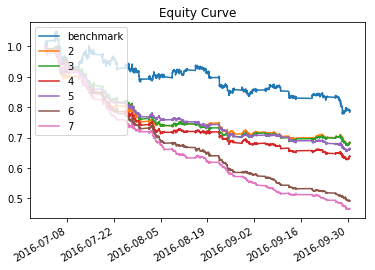

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.255326             -0.005950                -0.002618   
1               0.244491             -0.005891                -0.002783   
2               0.249877             -0.006914                -0.002519   
3               0.241679             -0.006331                -0.002328   
4               0.252175             -0.010996                -0.002364   
5               0.278503             -0.011880                -0.002461   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001368                 -0.000192             -0.032738   
1                 0.001378                 -0.000214             -0.029246   
2                 0.001357                 -0.000238             -0.029660   
3                 0.001422                 -0.000212             -0.029272   
4                 0.001586                 -0.000366             -0.028671   
5     

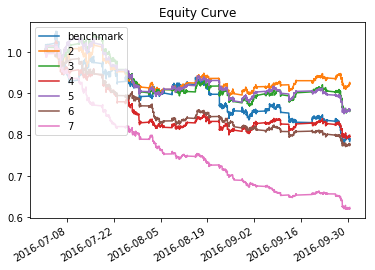

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.259375             -0.001170                -0.004197   
1               0.247942             -0.002291                -0.004330   
2               0.250941             -0.003453                -0.004055   
3               0.241148             -0.002274                -0.003906   
4               0.253652             -0.003864                -0.003366   
5               0.261716             -0.007332                -0.003046   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002434                 -0.000103             -0.030689   
1                 0.002371                 -0.000207             -0.033560   
2                 0.002069                 -0.000277             -0.033865   
3                 0.002340                 -0.000189             -0.032892   
4                 0.002203                 -0.000268             -0.030282   
5     

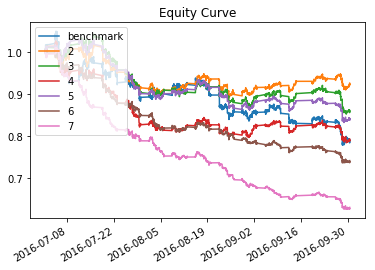

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.259375             -0.001170                -0.004197   
1               0.247942             -0.002291                -0.004330   
2               0.252072             -0.003571                -0.003945   
3               0.243557             -0.002634                -0.003699   
4               0.244413             -0.004634                -0.003197   
5               0.264143             -0.007196                -0.002923   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002434                 -0.000103             -0.030689   
1                 0.002371                 -0.000207             -0.033560   
2                 0.002050                 -0.000280             -0.033865   
3                 0.002298                 -0.000207             -0.032892   
4                 0.002115                 -0.000298             -0.030492   
5     

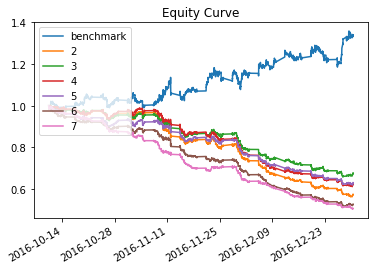

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.369853             -0.009117                -0.003625   
1               0.355033             -0.006385                -0.003786   
2               0.343521             -0.007699                -0.003574   
3               0.358110             -0.007577                -0.003339   
4               0.378330             -0.010580                -0.003219   
5               0.389455             -0.011227                -0.003189   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001702                 -0.000286             -0.037583   
1                 0.001777                 -0.000229             -0.035399   
2                 0.001723                 -0.000261             -0.035782   
3                 0.001790                 -0.000254             -0.035411   
4                 0.002009                 -0.000351             -0.033809   
5     

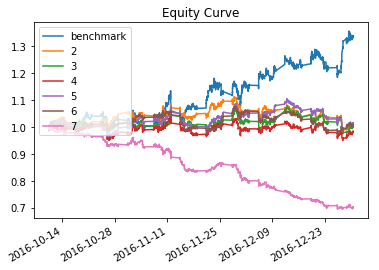

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.357924              0.000339                -0.005544   
1               0.367420              0.000114                -0.005733   
2               0.335362             -0.000162                -0.005179   
3               0.349536              0.000356                -0.005245   
4               0.342970              0.000207                -0.004513   
5               0.361725             -0.005826                -0.004086   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003378                  0.000028             -0.056156   
1                 0.003337                  0.000007             -0.056438   
2                 0.003087                 -0.000014             -0.037645   
3                 0.003347                  0.000025             -0.043606   
4                 0.003111                  0.000014             -0.035096   
5     

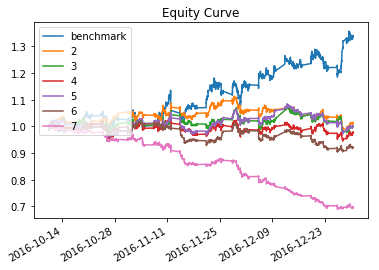

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.357924              0.000339                -0.005544   
1               0.367420              0.000114                -0.005733   
2               0.335959             -0.000248                -0.005112   
3               0.344418              0.000134                -0.005086   
4               0.344264             -0.001263                -0.004329   
5               0.372843             -0.005918                -0.003936   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003378                  0.000028             -0.056156   
1                 0.003337                  0.000007             -0.056438   
2                 0.003066                 -0.000021             -0.037645   
3                 0.003291                  0.000010             -0.043969   
4                 0.002972                 -0.000079             -0.035096   
5     

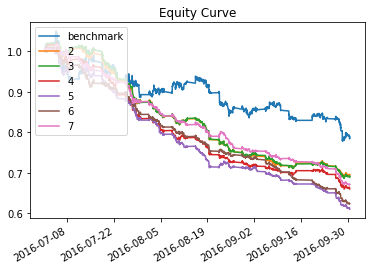

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.256188             -0.005614                -0.002858   
1               0.255161             -0.005732                -0.002956   
2               0.253738             -0.006442                -0.003233   
3               0.260668             -0.007680                -0.002977   
4               0.244736             -0.007335                -0.003093   
5               0.253023             -0.006183                -0.003181   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001898                 -0.000301             -0.030769   
1                 0.001889                 -0.000315             -0.030769   
2                 0.001898                 -0.000365             -0.034455   
3                 0.002145                 -0.000434             -0.034721   
4                 0.002267                 -0.000443             -0.033612   
5     

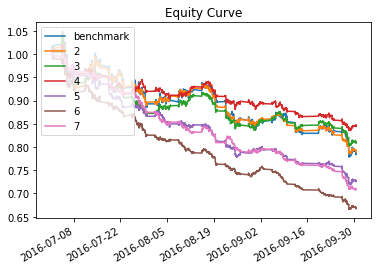

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.249560             -0.003589                -0.114856   
1               0.251314             -0.003221                -0.010760   
2               0.264639             -0.002548                -0.006262   
3               0.254976             -0.004923                -0.005344   
4               0.261829             -0.006233                -0.004456   
5               0.239758             -0.005315                -0.003717   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.114856             -0.229192   
1                 0.005594                 -0.002280             -0.065955   
2                 0.003545                 -0.000520             -0.042200   
3                 0.003293                 -0.000827             -0.049140   
4                 0.003121                 -0.000782             -0.042230   
5     

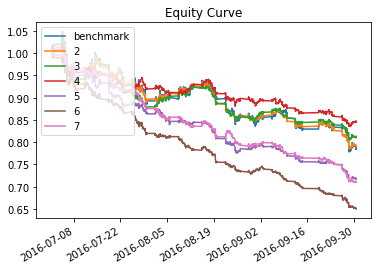

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.249560             -0.003589                -0.114856   
1               0.250882             -0.003192                -0.009129   
2               0.264639             -0.002548                -0.006262   
3               0.255720             -0.005160                -0.005284   
4               0.259742             -0.006705                -0.004356   
5               0.241057             -0.005279                -0.003713   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.114856             -0.229192   
1                 0.004915                 -0.001720             -0.059547   
2                 0.003545                 -0.000520             -0.042200   
3                 0.003287                 -0.000852             -0.048046   
4                 0.003062                 -0.000814             -0.042230   
5     

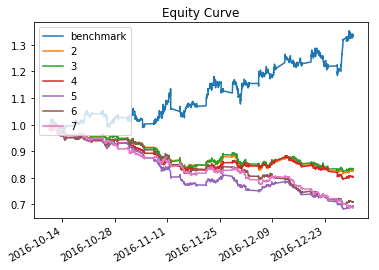

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.355612             -0.003081                -0.003952   
1               0.361454             -0.002934                -0.003998   
2               0.354524             -0.003536                -0.004373   
3               0.376582             -0.006028                -0.004065   
4               0.379020             -0.005663                -0.004240   
5               0.363679             -0.006179                -0.004299   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002564                 -0.000164             -0.041321   
1                 0.002573                 -0.000158             -0.041321   
2                 0.002585                 -0.000202             -0.047298   
3                 0.002812                 -0.000339             -0.045508   
4                 0.003033                 -0.000336             -0.041523   
5     

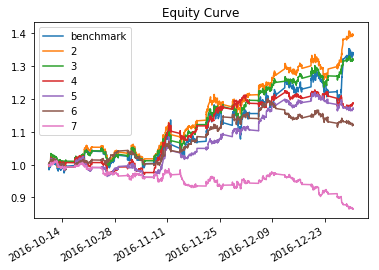

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.365513              0.005659                -0.000520   
1               0.348618              0.004717                -0.010280   
2               0.374084              0.002939                -0.007954   
3               0.369975              0.002721                -0.006213   
4               0.350126              0.001983                -0.005570   
5               0.347890             -0.002332                -0.004884   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.340056                  0.169768             -0.000520   
1                 0.012106                  0.003159             -0.048723   
2                 0.005360                  0.000550             -0.070591   
3                 0.005513                  0.000460             -0.058417   
4                 0.004877                  0.000254             -0.053638   
5     

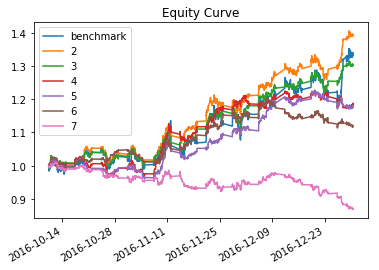

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.365513              0.005659                -0.000520   
1               0.354034              0.004523                -0.009756   
2               0.374084              0.002939                -0.007954   
3               0.370516              0.002837                -0.006145   
4               0.347123              0.001952                -0.005455   
5               0.348223             -0.002251                -0.004873   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.340056                  0.169768             -0.000520   
1                 0.011368                  0.002732             -0.051364   
2                 0.005360                  0.000550             -0.070591   
3                 0.005513                  0.000478             -0.058417   
4                 0.004824                  0.000246             -0.053638   
5     

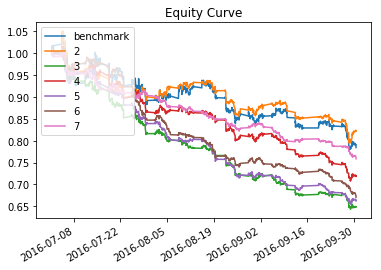

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.276342             -0.002963                -0.004833   
1               0.253068             -0.006686                -0.004318   
2               0.259782             -0.005080                -0.004478   
3               0.262672             -0.006377                -0.003858   
4               0.276801             -0.006200                -0.003788   
5               0.252920             -0.004282                -0.003656   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002928                 -0.000429             -0.047581   
1                 0.002245                 -0.000713             -0.044271   
2                 0.002733                 -0.000646             -0.042618   
3                 0.002841                 -0.000635             -0.039149   
4                 0.002971                 -0.000577             -0.035620   
5     

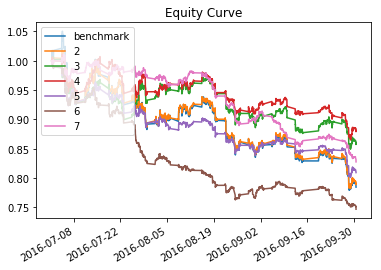

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.238791             -0.003583                -0.114643   
1               0.242533             -0.002302                -0.013768   
2               0.264615             -0.001918                -0.008608   
3               0.246532             -0.003248                -0.006049   
4               0.272486             -0.004515                -0.004911   
5               0.258572             -0.002919                -0.004456   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.114643             -0.228765   
1                 0.007037                 -0.002078             -0.057502   
2                 0.006198                 -0.000896             -0.057347   
3                 0.004274                 -0.000798             -0.050647   
4                 0.003544                 -0.000726             -0.044132   
5     

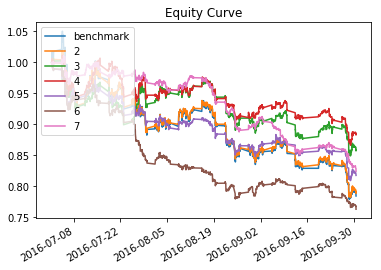

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.238791             -0.003583                -0.114643   
1               0.242533             -0.002302                -0.013768   
2               0.264898             -0.001854                -0.008431   
3               0.247693             -0.003087                -0.005876   
4               0.273031             -0.004178                -0.004851   
5               0.256663             -0.002981                -0.004437   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.114643             -0.228765   
1                 0.007037                 -0.002078             -0.057502   
2                 0.006153                 -0.000848             -0.057347   
3                 0.004276                 -0.000731             -0.050647   
4                 0.003571                 -0.000662             -0.044132   
5     

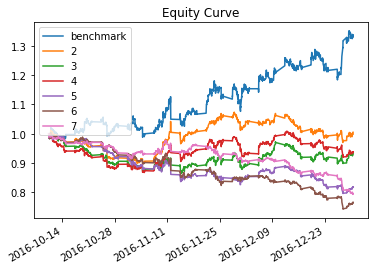

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.349088              0.000194                -0.006189   
1               0.369282             -0.001064                -0.005363   
2               0.357826             -0.000957                -0.005761   
3               0.361681             -0.003263                -0.005338   
4               0.384393             -0.004391                -0.005192   
5               0.383957             -0.003807                -0.005002   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.004646                  0.000031             -0.054400   
1                 0.003596                 -0.000105             -0.054714   
2                 0.004113                 -0.000115             -0.049329   
3                 0.004112                 -0.000327             -0.063790   
4                 0.004091                 -0.000407             -0.057057   
5     

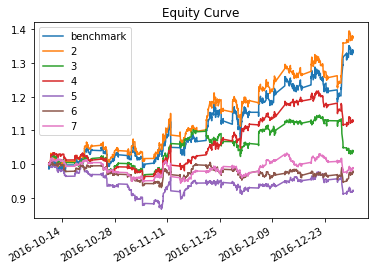

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.362838              0.005538                -0.000520   
1               0.375071              0.000751                -0.014917   
2               0.331481              0.002161                -0.010792   
3               0.364345             -0.001260                -0.008593   
4               0.367781             -0.000290                -0.006530   
5               0.384661             -0.000142                -0.006228   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.332779                  0.166129             -0.000520   
1                 0.011284                  0.000437             -0.095501   
2                 0.010318                  0.001185             -0.066165   
3                 0.006659                 -0.000339             -0.070079   
4                 0.005349                 -0.000045             -0.054659   
5     

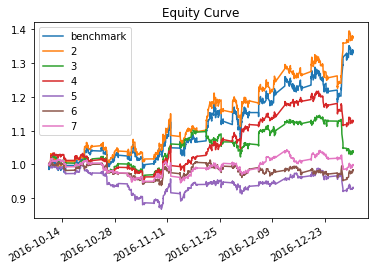

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.362838              0.005538                -0.000520   
1               0.375071              0.000751                -0.014917   
2               0.331481              0.002161                -0.010792   
3               0.363985             -0.001078                -0.008409   
4               0.369836             -0.000189                -0.006485   
5               0.384240              0.000036                -0.006220   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.332779                  0.166129             -0.000520   
1                 0.011284                  0.000437             -0.095501   
2                 0.010318                  0.001185             -0.066165   
3                 0.006475                 -0.000273             -0.070079   
4                 0.005316                 -0.000029             -0.054659   
5     

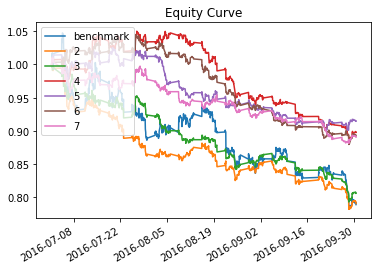

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.244254             -0.003622                -0.008317   
1               0.264748             -0.003323                -0.006893   
2               0.266060             -0.001644                -0.005784   
3               0.275911             -0.001362                -0.005427   
4               0.278237             -0.001744                -0.005587   
5               0.259773             -0.001780                -0.005603   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003815                 -0.001267             -0.064012   
1                 0.003519                 -0.000727             -0.052362   
2                 0.003972                 -0.000323             -0.048609   
3                 0.004522                 -0.000275             -0.035336   
4                 0.004387                 -0.000354             -0.040458   
5     

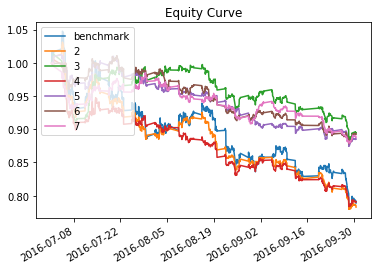

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.246932             -0.003765                -0.120465   
1               0.284356             -0.001695                -0.012493   
2               0.264014             -0.003623                -0.012935   
3               0.264910             -0.001873                -0.007716   
4               0.252645             -0.001752                -0.006863   
5               0.266078             -0.001820                -0.006696   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.120465             -0.240409   
1                 0.007217                 -0.001328             -0.081579   
2                 0.005964                 -0.003051             -0.067620   
3                 0.005472                 -0.000774             -0.052779   
4                 0.005483                 -0.000608             -0.039994   
5     

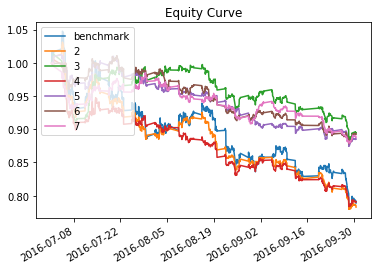

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.246932             -0.003765                -0.120465   
1               0.284356             -0.001695                -0.012493   
2               0.264014             -0.003623                -0.012935   
3               0.264910             -0.001873                -0.007716   
4               0.252645             -0.001752                -0.006863   
5               0.266078             -0.001820                -0.006696   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.120465             -0.240409   
1                 0.007217                 -0.001328             -0.081579   
2                 0.005964                 -0.003051             -0.067620   
3                 0.005472                 -0.000774             -0.052779   
4                 0.005483                 -0.000608             -0.039994   
5     

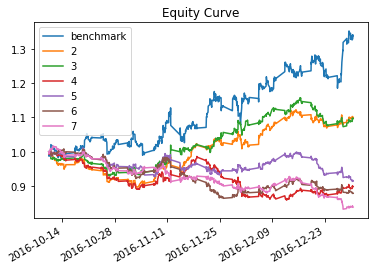

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.326729              0.001676                -0.009575   
1               0.365618              0.001626                -0.009032   
2               0.350810             -0.001726                -0.008073   
3               0.375021             -0.001423                -0.007317   
4               0.372368             -0.002103                -0.007446   
5               0.376927             -0.002892                -0.007635   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.007118                  0.000520             -0.052492   
1                 0.005080                  0.000315             -0.063433   
2                 0.005667                 -0.000350             -0.052298   
3                 0.006614                 -0.000304             -0.075010   
4                 0.006099                 -0.000392             -0.068958   
5     

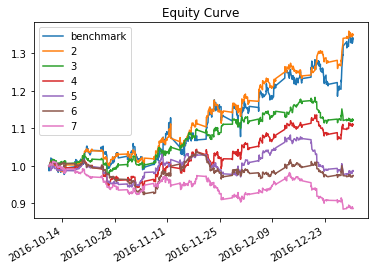

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.360529              0.005126                -0.000520   
1               0.359368              0.002006                -0.015725   
2               0.335952              0.001837                -0.013296   
3               0.357105             -0.000158                -0.011328   
4               0.353273             -0.000373                -0.009749   
5               0.375125             -0.001952                -0.009474   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.308107                  0.153794             -0.000520   
1                 0.013027                  0.001569             -0.079607   
2                 0.014417                  0.002229             -0.061297   
3                 0.009437                 -0.000079             -0.084416   
4                 0.008763                 -0.000133             -0.070789   
5     

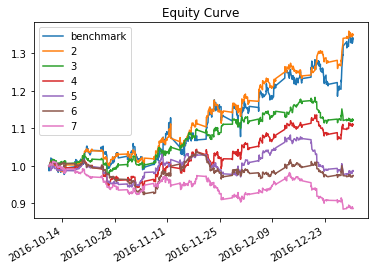

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.360529              0.005126                -0.000520   
1               0.359368              0.002006                -0.015725   
2               0.335952              0.001837                -0.013296   
3               0.357105             -0.000158                -0.011328   
4               0.353273             -0.000373                -0.009749   
5               0.375125             -0.001952                -0.009474   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.308107                  0.153794             -0.000520   
1                 0.013027                  0.001569             -0.079607   
2                 0.014417                  0.002229             -0.061297   
3                 0.009437                 -0.000079             -0.084416   
4                 0.008763                 -0.000133             -0.070789   
5     

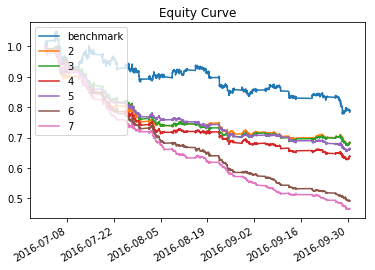

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.255326             -0.005950                -0.002618   
1               0.244491             -0.005891                -0.002783   
2               0.249877             -0.006914                -0.002519   
3               0.241679             -0.006331                -0.002328   
4               0.252175             -0.010996                -0.002364   
5               0.278503             -0.011880                -0.002461   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001368                 -0.000192             -0.032738   
1                 0.001378                 -0.000214             -0.029246   
2                 0.001357                 -0.000238             -0.029660   
3                 0.001422                 -0.000212             -0.029272   
4                 0.001586                 -0.000366             -0.028671   
5     

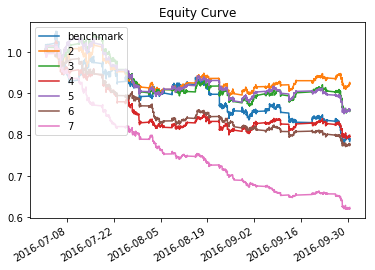

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.259375             -0.001170                -0.004197   
1               0.247942             -0.002291                -0.004330   
2               0.250941             -0.003453                -0.004055   
3               0.241148             -0.002274                -0.003906   
4               0.253652             -0.003864                -0.003366   
5               0.261716             -0.007332                -0.003046   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002434                 -0.000103             -0.030689   
1                 0.002371                 -0.000207             -0.033560   
2                 0.002069                 -0.000277             -0.033865   
3                 0.002340                 -0.000189             -0.032892   
4                 0.002203                 -0.000268             -0.030282   
5     

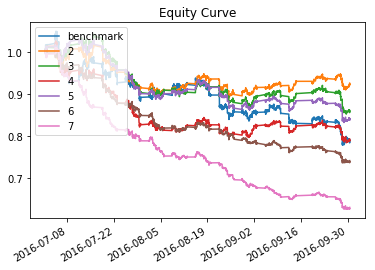

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.259375             -0.001170                -0.004197   
1               0.247942             -0.002291                -0.004330   
2               0.252072             -0.003571                -0.003945   
3               0.243557             -0.002634                -0.003699   
4               0.244413             -0.004634                -0.003197   
5               0.264143             -0.007196                -0.002923   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002434                 -0.000103             -0.030689   
1                 0.002371                 -0.000207             -0.033560   
2                 0.002050                 -0.000280             -0.033865   
3                 0.002298                 -0.000207             -0.032892   
4                 0.002115                 -0.000298             -0.030492   
5     

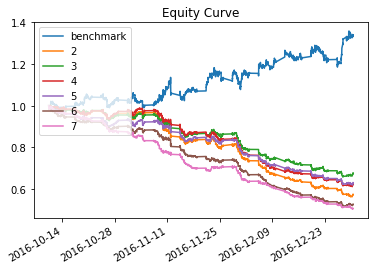

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.369853             -0.009117                -0.003625   
1               0.355033             -0.006385                -0.003786   
2               0.343521             -0.007699                -0.003574   
3               0.358110             -0.007577                -0.003339   
4               0.378330             -0.010580                -0.003219   
5               0.389455             -0.011227                -0.003189   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001702                 -0.000286             -0.037583   
1                 0.001777                 -0.000229             -0.035399   
2                 0.001723                 -0.000261             -0.035782   
3                 0.001790                 -0.000254             -0.035411   
4                 0.002009                 -0.000351             -0.033809   
5     

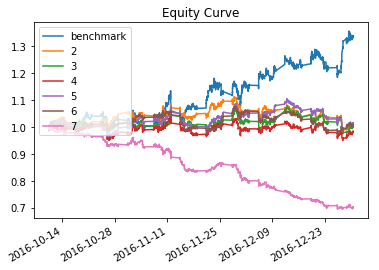

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.357924              0.000339                -0.005544   
1               0.367420              0.000114                -0.005733   
2               0.335362             -0.000162                -0.005179   
3               0.349536              0.000356                -0.005245   
4               0.342970              0.000207                -0.004513   
5               0.361725             -0.005826                -0.004086   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003378                  0.000028             -0.056156   
1                 0.003337                  0.000007             -0.056438   
2                 0.003087                 -0.000014             -0.037645   
3                 0.003347                  0.000025             -0.043606   
4                 0.003111                  0.000014             -0.035096   
5     

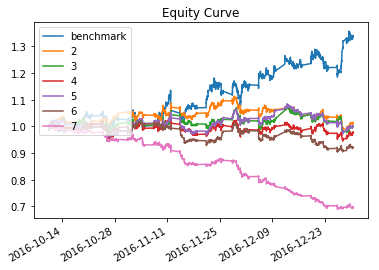

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.357924              0.000339                -0.005544   
1               0.367420              0.000114                -0.005733   
2               0.335959             -0.000248                -0.005112   
3               0.344418              0.000134                -0.005086   
4               0.344264             -0.001263                -0.004329   
5               0.372843             -0.005918                -0.003936   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003378                  0.000028             -0.056156   
1                 0.003337                  0.000007             -0.056438   
2                 0.003066                 -0.000021             -0.037645   
3                 0.003291                  0.000010             -0.043969   
4                 0.002972                 -0.000079             -0.035096   
5     

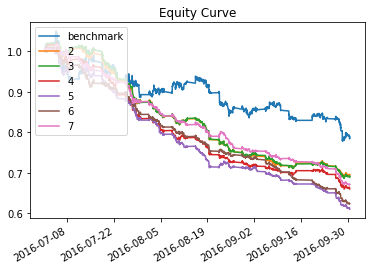

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.256188             -0.005614                -0.002858   
1               0.255161             -0.005732                -0.002956   
2               0.253738             -0.006442                -0.003233   
3               0.260668             -0.007680                -0.002977   
4               0.244736             -0.007335                -0.003093   
5               0.253023             -0.006183                -0.003181   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001898                 -0.000301             -0.030769   
1                 0.001889                 -0.000315             -0.030769   
2                 0.001898                 -0.000365             -0.034455   
3                 0.002145                 -0.000434             -0.034721   
4                 0.002267                 -0.000443             -0.033612   
5     

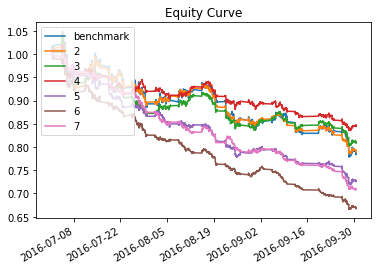

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.249560             -0.003589                -0.114856   
1               0.251314             -0.003221                -0.010760   
2               0.264639             -0.002548                -0.006262   
3               0.254976             -0.004923                -0.005344   
4               0.261829             -0.006233                -0.004456   
5               0.239758             -0.005315                -0.003717   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.114856             -0.229192   
1                 0.005594                 -0.002280             -0.065955   
2                 0.003545                 -0.000520             -0.042200   
3                 0.003293                 -0.000827             -0.049140   
4                 0.003121                 -0.000782             -0.042230   
5     

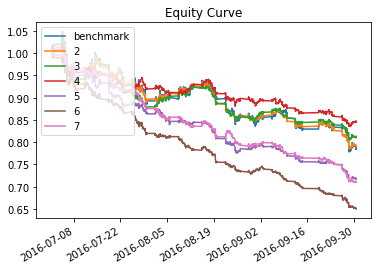

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.249560             -0.003589                -0.114856   
1               0.250882             -0.003192                -0.009129   
2               0.264639             -0.002548                -0.006262   
3               0.255720             -0.005160                -0.005284   
4               0.259742             -0.006705                -0.004356   
5               0.241057             -0.005279                -0.003713   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.114856             -0.229192   
1                 0.004915                 -0.001720             -0.059547   
2                 0.003545                 -0.000520             -0.042200   
3                 0.003287                 -0.000852             -0.048046   
4                 0.003062                 -0.000814             -0.042230   
5     

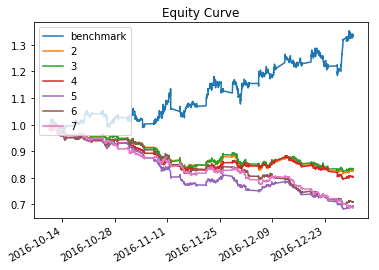

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.355612             -0.003081                -0.003952   
1               0.361454             -0.002934                -0.003998   
2               0.354524             -0.003536                -0.004373   
3               0.376582             -0.006028                -0.004065   
4               0.379020             -0.005663                -0.004240   
5               0.363679             -0.006179                -0.004299   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002564                 -0.000164             -0.041321   
1                 0.002573                 -0.000158             -0.041321   
2                 0.002585                 -0.000202             -0.047298   
3                 0.002812                 -0.000339             -0.045508   
4                 0.003033                 -0.000336             -0.041523   
5     

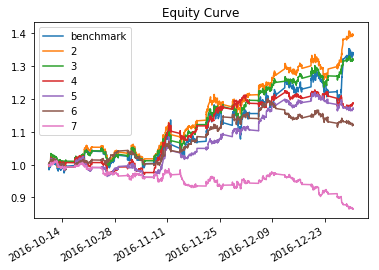

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.365513              0.005659                -0.000520   
1               0.348618              0.004717                -0.010280   
2               0.374084              0.002939                -0.007954   
3               0.369975              0.002721                -0.006213   
4               0.350126              0.001983                -0.005570   
5               0.347890             -0.002332                -0.004884   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.340056                  0.169768             -0.000520   
1                 0.012106                  0.003159             -0.048723   
2                 0.005360                  0.000550             -0.070591   
3                 0.005513                  0.000460             -0.058417   
4                 0.004877                  0.000254             -0.053638   
5     

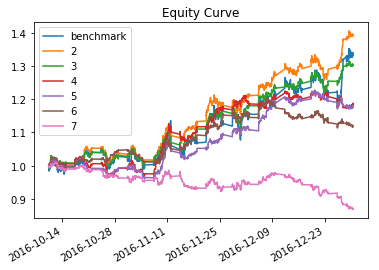

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.365513              0.005659                -0.000520   
1               0.354034              0.004523                -0.009756   
2               0.374084              0.002939                -0.007954   
3               0.370516              0.002837                -0.006145   
4               0.347123              0.001952                -0.005455   
5               0.348223             -0.002251                -0.004873   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.340056                  0.169768             -0.000520   
1                 0.011368                  0.002732             -0.051364   
2                 0.005360                  0.000550             -0.070591   
3                 0.005513                  0.000478             -0.058417   
4                 0.004824                  0.000246             -0.053638   
5     

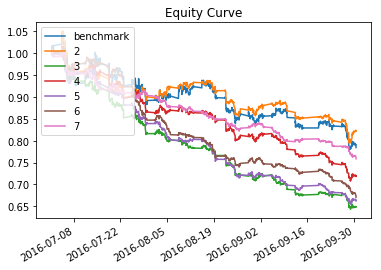

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.276342             -0.002963                -0.004833   
1               0.253068             -0.006686                -0.004318   
2               0.259782             -0.005080                -0.004478   
3               0.262672             -0.006377                -0.003858   
4               0.276801             -0.006200                -0.003788   
5               0.252920             -0.004282                -0.003656   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002928                 -0.000429             -0.047581   
1                 0.002245                 -0.000713             -0.044271   
2                 0.002733                 -0.000646             -0.042618   
3                 0.002841                 -0.000635             -0.039149   
4                 0.002971                 -0.000577             -0.035620   
5     

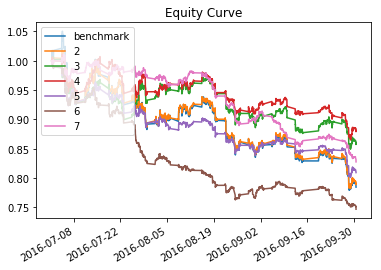

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.238791             -0.003583                -0.114643   
1               0.242533             -0.002302                -0.013768   
2               0.264615             -0.001918                -0.008608   
3               0.246532             -0.003248                -0.006049   
4               0.272486             -0.004515                -0.004911   
5               0.258572             -0.002919                -0.004456   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.114643             -0.228765   
1                 0.007037                 -0.002078             -0.057502   
2                 0.006198                 -0.000896             -0.057347   
3                 0.004274                 -0.000798             -0.050647   
4                 0.003544                 -0.000726             -0.044132   
5     

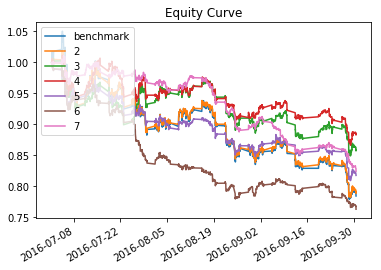

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.238791             -0.003583                -0.114643   
1               0.242533             -0.002302                -0.013768   
2               0.264898             -0.001854                -0.008431   
3               0.247693             -0.003087                -0.005876   
4               0.273031             -0.004178                -0.004851   
5               0.256663             -0.002981                -0.004437   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.114643             -0.228765   
1                 0.007037                 -0.002078             -0.057502   
2                 0.006153                 -0.000848             -0.057347   
3                 0.004276                 -0.000731             -0.050647   
4                 0.003571                 -0.000662             -0.044132   
5     

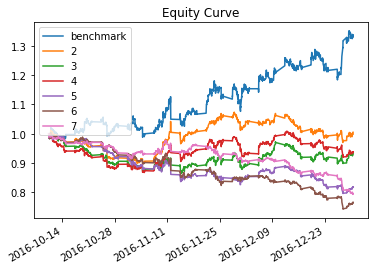

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.349088              0.000194                -0.006189   
1               0.369282             -0.001064                -0.005363   
2               0.357826             -0.000957                -0.005761   
3               0.361681             -0.003263                -0.005338   
4               0.384393             -0.004391                -0.005192   
5               0.383957             -0.003807                -0.005002   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.004646                  0.000031             -0.054400   
1                 0.003596                 -0.000105             -0.054714   
2                 0.004113                 -0.000115             -0.049329   
3                 0.004112                 -0.000327             -0.063790   
4                 0.004091                 -0.000407             -0.057057   
5     

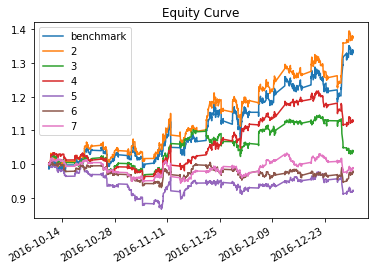

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.362838              0.005538                -0.000520   
1               0.375071              0.000751                -0.014917   
2               0.331481              0.002161                -0.010792   
3               0.364345             -0.001260                -0.008593   
4               0.367781             -0.000290                -0.006530   
5               0.384661             -0.000142                -0.006228   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.332779                  0.166129             -0.000520   
1                 0.011284                  0.000437             -0.095501   
2                 0.010318                  0.001185             -0.066165   
3                 0.006659                 -0.000339             -0.070079   
4                 0.005349                 -0.000045             -0.054659   
5     

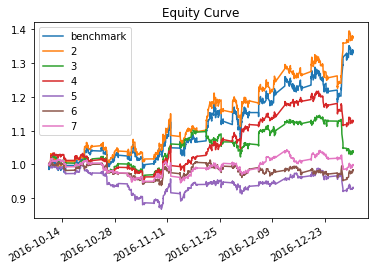

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.362838              0.005538                -0.000520   
1               0.375071              0.000751                -0.014917   
2               0.331481              0.002161                -0.010792   
3               0.363985             -0.001078                -0.008409   
4               0.369836             -0.000189                -0.006485   
5               0.384240              0.000036                -0.006220   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.332779                  0.166129             -0.000520   
1                 0.011284                  0.000437             -0.095501   
2                 0.010318                  0.001185             -0.066165   
3                 0.006475                 -0.000273             -0.070079   
4                 0.005316                 -0.000029             -0.054659   
5     

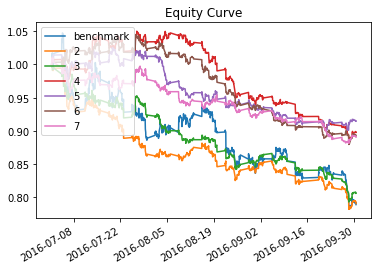

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.244254             -0.003622                -0.008317   
1               0.264748             -0.003323                -0.006893   
2               0.266060             -0.001644                -0.005784   
3               0.275911             -0.001362                -0.005427   
4               0.278237             -0.001744                -0.005587   
5               0.259773             -0.001780                -0.005603   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003815                 -0.001267             -0.064012   
1                 0.003519                 -0.000727             -0.052362   
2                 0.003972                 -0.000323             -0.048609   
3                 0.004522                 -0.000275             -0.035336   
4                 0.004387                 -0.000354             -0.040458   
5     

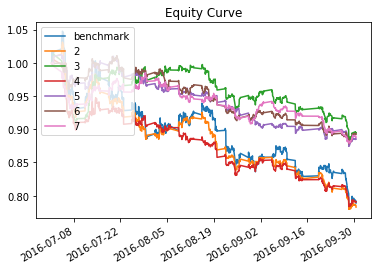

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.246932             -0.003765                -0.120465   
1               0.284356             -0.001695                -0.012493   
2               0.264014             -0.003623                -0.012935   
3               0.264910             -0.001873                -0.007716   
4               0.252645             -0.001752                -0.006863   
5               0.266078             -0.001820                -0.006696   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.120465             -0.240409   
1                 0.007217                 -0.001328             -0.081579   
2                 0.005964                 -0.003051             -0.067620   
3                 0.005472                 -0.000774             -0.052779   
4                 0.005483                 -0.000608             -0.039994   
5     

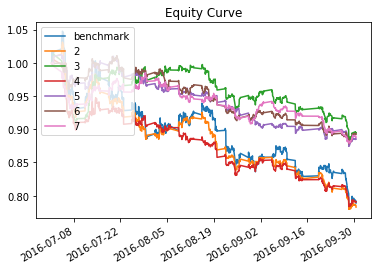

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.246932             -0.003765                -0.120465   
1               0.284356             -0.001695                -0.012493   
2               0.264014             -0.003623                -0.012935   
3               0.264910             -0.001873                -0.007716   
4               0.252645             -0.001752                -0.006863   
5               0.266078             -0.001820                -0.006696   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.120465             -0.240409   
1                 0.007217                 -0.001328             -0.081579   
2                 0.005964                 -0.003051             -0.067620   
3                 0.005472                 -0.000774             -0.052779   
4                 0.005483                 -0.000608             -0.039994   
5     

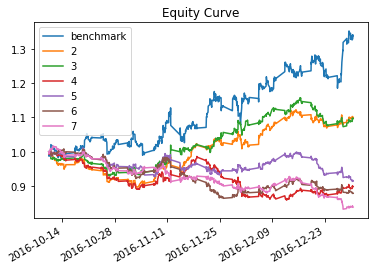

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.326729              0.001676                -0.009575   
1               0.365618              0.001626                -0.009032   
2               0.350810             -0.001726                -0.008073   
3               0.375021             -0.001423                -0.007317   
4               0.372368             -0.002103                -0.007446   
5               0.376927             -0.002892                -0.007635   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.007118                  0.000520             -0.052492   
1                 0.005080                  0.000315             -0.063433   
2                 0.005667                 -0.000350             -0.052298   
3                 0.006614                 -0.000304             -0.075010   
4                 0.006099                 -0.000392             -0.068958   
5     

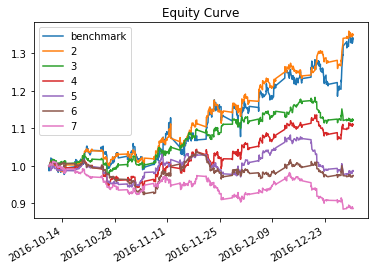

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.360529              0.005126                -0.000520   
1               0.359368              0.002006                -0.015725   
2               0.335952              0.001837                -0.013296   
3               0.357105             -0.000158                -0.011328   
4               0.353273             -0.000373                -0.009749   
5               0.375125             -0.001952                -0.009474   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.308107                  0.153794             -0.000520   
1                 0.013027                  0.001569             -0.079607   
2                 0.014417                  0.002229             -0.061297   
3                 0.009437                 -0.000079             -0.084416   
4                 0.008763                 -0.000133             -0.070789   
5     

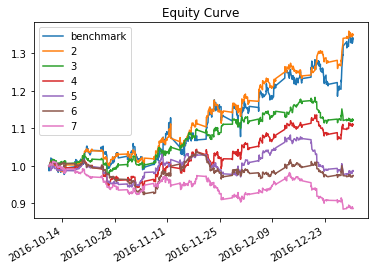

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.360529              0.005126                -0.000520   
1               0.359368              0.002006                -0.015725   
2               0.335952              0.001837                -0.013296   
3               0.357105             -0.000158                -0.011328   
4               0.353273             -0.000373                -0.009749   
5               0.375125             -0.001952                -0.009474   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.308107                  0.153794             -0.000520   
1                 0.013027                  0.001569             -0.079607   
2                 0.014417                  0.002229             -0.061297   
3                 0.009437                 -0.000079             -0.084416   
4                 0.008763                 -0.000133             -0.070789   
5     

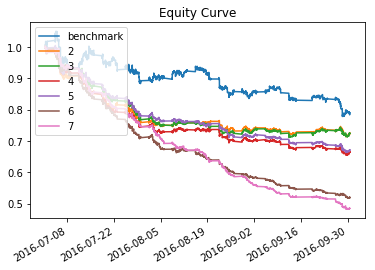

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.256399             -0.005043                -0.002845   
1               0.246246             -0.004984                -0.003089   
2               0.250566             -0.006289                -0.002599   
3               0.247412             -0.006156                -0.002580   
4               0.254594             -0.010162                -0.002511   
5               0.273037             -0.011271                -0.002540   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001362                 -0.000171             -0.032738   
1                 0.001372                 -0.000192             -0.029246   
2                 0.001368                 -0.000225             -0.029660   
3                 0.001462                 -0.000225             -0.029904   
4                 0.001584                 -0.000354             -0.029932   
5     

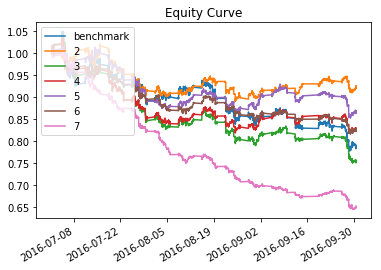

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.259375             -0.001170                -0.004197   
1               0.251517             -0.004313                -0.004426   
2               0.255517             -0.002845                -0.004211   
3               0.251172             -0.002125                -0.004173   
4               0.233291             -0.002901                -0.003600   
5               0.239249             -0.006612                -0.003177   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002434                 -0.000103             -0.030689   
1                 0.002105                 -0.000366             -0.035702   
2                 0.002240                 -0.000248             -0.033768   
3                 0.002235                 -0.000190             -0.033560   
4                 0.002305                 -0.000217             -0.027722   
5     

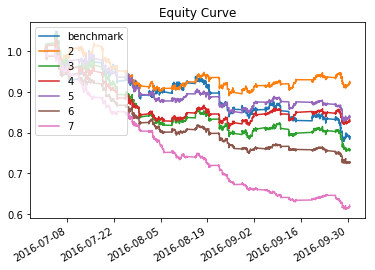

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.259375             -0.001170                -0.004197   
1               0.249739             -0.004240                -0.004009   
2               0.253773             -0.002803                -0.004011   
3               0.239690             -0.002626                -0.003692   
4               0.232851             -0.004907                -0.003107   
5               0.252021             -0.007406                -0.002969   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002434                 -0.000103             -0.030689   
1                 0.001956                 -0.000310             -0.033771   
2                 0.002240                 -0.000233             -0.033956   
3                 0.002059                 -0.000194             -0.034385   
4                 0.002038                 -0.000296             -0.027106   
5     

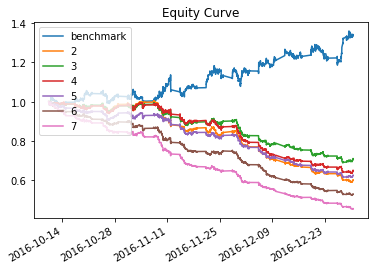

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.374669             -0.008319                -0.003845   
1               0.358145             -0.005587                -0.004090   
2               0.340744             -0.007030                -0.003664   
3               0.352114             -0.007674                -0.003624   
4               0.353906             -0.010403                -0.003414   
5               0.380176             -0.012969                -0.003344   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001702                 -0.000269             -0.037583   
1                 0.001778                 -0.000208             -0.035399   
2                 0.001733                 -0.000243             -0.035399   
3                 0.001830                 -0.000275             -0.035028   
4                 0.001984                 -0.000350             -0.033819   
5     

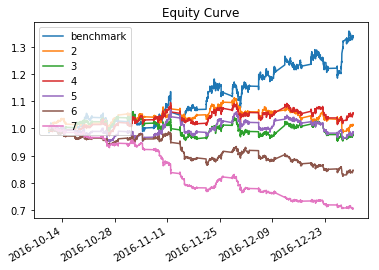

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.357924              0.000339                -0.005544   
1               0.320751             -0.000239                -0.005073   
2               0.332289              0.001043                -0.005173   
3               0.349643             -0.000125                -0.005455   
4               0.356393             -0.002673                -0.004877   
5               0.379150             -0.005707                -0.004216   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003378                  0.000028             -0.056156   
1                 0.002899                 -0.000019             -0.035915   
2                 0.003201                  0.000081             -0.036430   
3                 0.003130                 -0.000009             -0.042948   
4                 0.003076                 -0.000198             -0.037398   
5     

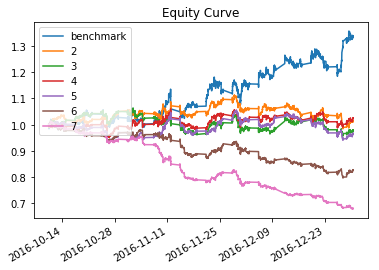

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.357924              0.000339                -0.005544   
1               0.327890             -0.000228                -0.004921   
2               0.332511              0.000543                -0.005062   
3               0.348173             -0.000471                -0.004980   
4               0.349069             -0.003073                -0.004273   
5               0.391791             -0.006352                -0.003922   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003378                  0.000028             -0.056156   
1                 0.002708                 -0.000016             -0.036575   
2                 0.003193                  0.000041             -0.037645   
3                 0.002947                 -0.000034             -0.041150   
4                 0.002802                 -0.000180             -0.036021   
5     

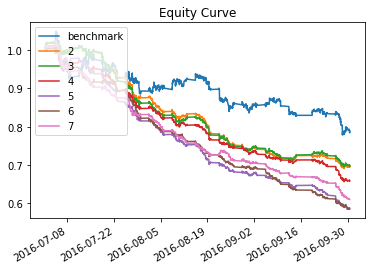

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.256188             -0.005614                -0.002858   
1               0.256792             -0.005568                -0.003158   
2               0.246251             -0.006514                -0.003056   
3               0.253048             -0.008309                -0.003064   
4               0.262034             -0.008338                -0.003118   
5               0.278021             -0.007696                -0.003304   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001898                 -0.000301             -0.030769   
1                 0.001892                 -0.000321             -0.030979   
2                 0.001968                 -0.000371             -0.034005   
3                 0.002135                 -0.000476             -0.034445   
4                 0.002239                 -0.000484             -0.034746   
5     

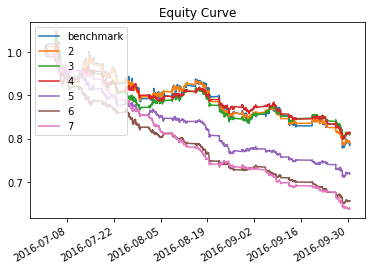

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.249560             -0.003589                -0.114856   
1               0.251314             -0.003221                -0.010760   
2               0.265806             -0.003170                -0.008243   
3               0.244641             -0.005134                -0.005394   
4               0.242957             -0.006555                -0.004408   
5               0.244908             -0.006979                -0.003849   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.114856             -0.229192   
1                 0.005594                 -0.002280             -0.065955   
2                 0.004049                 -0.000962             -0.057639   
3                 0.003207                 -0.000877             -0.047049   
4                 0.002944                 -0.000794             -0.042814   
5     

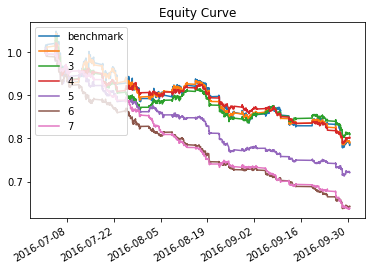

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.249560             -0.003589                -0.114856   
1               0.251314             -0.003221                -0.010760   
2               0.261136             -0.003385                -0.007247   
3               0.246848             -0.005071                -0.005123   
4               0.242234             -0.006881                -0.004219   
5               0.245535             -0.006989                -0.003810   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.114856             -0.229192   
1                 0.005594                 -0.002280             -0.065955   
2                 0.003993                 -0.000965             -0.048457   
3                 0.003220                 -0.000839             -0.047049   
4                 0.002863                 -0.000794             -0.042814   
5     

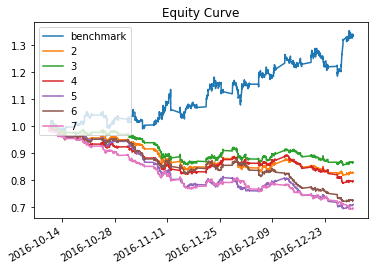

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.355612             -0.003081                -0.003952   
1               0.356063             -0.002319                -0.004200   
2               0.362283             -0.003742                -0.004191   
3               0.396665             -0.005682                -0.004120   
4               0.367518             -0.005313                -0.004165   
5               0.372094             -0.006038                -0.004314   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002564                 -0.000164             -0.041321   
1                 0.002577                 -0.000129             -0.041321   
2                 0.002647                 -0.000213             -0.047298   
3                 0.002821                 -0.000322             -0.044707   
4                 0.003015                 -0.000300             -0.044413   
5     

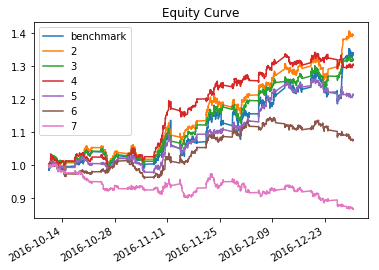

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.365513              0.005659                -0.000520   
1               0.348618              0.004717                -0.010280   
2               0.362350              0.004519                -0.008849   
3               0.364056              0.003317                -0.006657   
4               0.352900              0.001289                -0.005257   
5               0.374381             -0.002302                -0.004941   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.340056                  0.169768             -0.000520   
1                 0.012106                  0.003159             -0.048723   
2                 0.007420                  0.001339             -0.067548   
3                 0.005671                  0.000598             -0.064058   
4                 0.004848                  0.000154             -0.048746   
5     

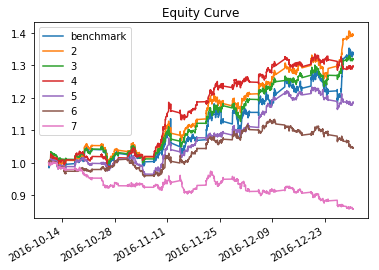

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.365513              0.005659                -0.000520   
1               0.348618              0.004717                -0.010280   
2               0.364668              0.004432                -0.008415   
3               0.362115              0.002935                -0.006430   
4               0.347925              0.000824                -0.005210   
5               0.373848             -0.002500                -0.004893   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.340056                  0.169768             -0.000520   
1                 0.012106                  0.003159             -0.048723   
2                 0.007213                  0.001242             -0.067931   
3                 0.005576                  0.000517             -0.062871   
4                 0.004690                  0.000096             -0.048746   
5     

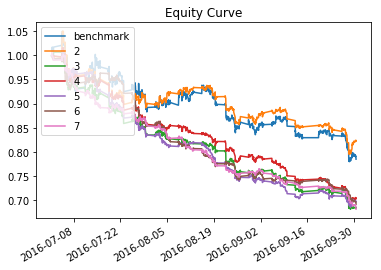

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.276342             -0.002963                -0.004833   
1               0.251814             -0.005872                -0.004375   
2               0.257965             -0.005441                -0.004343   
3               0.244282             -0.005598                -0.003980   
4               0.292112             -0.005733                -0.003817   
5               0.255279             -0.005977                -0.003851   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002928                 -0.000429             -0.047581   
1                 0.002465                 -0.000698             -0.046604   
2                 0.002456                 -0.000569             -0.042987   
3                 0.002818                 -0.000576             -0.036472   
4                 0.002953                 -0.000536             -0.040413   
5     

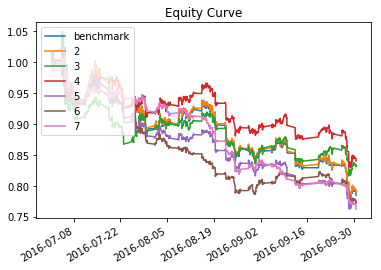

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.238791             -0.003583                -0.114643   
1               0.247732             -0.002793                -0.010903   
2               0.251991             -0.002648                -0.011767   
3               0.258980             -0.003960                -0.006988   
4               0.275651             -0.004003                -0.005178   
5               0.246570             -0.004211                -0.004462   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.114643             -0.228765   
1                 0.005575                 -0.001627             -0.056127   
2                 0.006712                 -0.001929             -0.064200   
3                 0.004199                 -0.001117             -0.066774   
4                 0.003688                 -0.000721             -0.054580   
5     

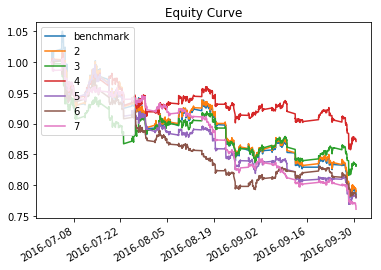

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.238791             -0.003583                -0.114643   
1               0.247732             -0.002793                -0.010903   
2               0.258893             -0.002094                -0.009742   
3               0.257990             -0.003821                -0.006779   
4               0.276309             -0.003819                -0.005156   
5               0.245051             -0.004234                -0.004432   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.114643             -0.228765   
1                 0.005575                 -0.001627             -0.056127   
2                 0.006240                 -0.001197             -0.064200   
3                 0.004087                 -0.001015             -0.064913   
4                 0.003688                 -0.000682             -0.054580   
5     

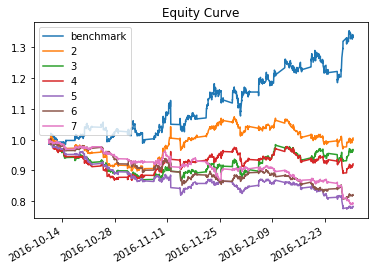

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.349088              0.000194                -0.006189   
1               0.366357             -0.000434                -0.005566   
2               0.351065             -0.001265                -0.005616   
3               0.357858             -0.003986                -0.005545   
4               0.380683             -0.003236                -0.005029   
5               0.377263             -0.003801                -0.005161   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.004646                  0.000031             -0.054400   
1                 0.003852                 -0.000048             -0.050132   
2                 0.003692                 -0.000138             -0.055126   
3                 0.003943                 -0.000409             -0.063790   
4                 0.003964                 -0.000294             -0.056670   
5     

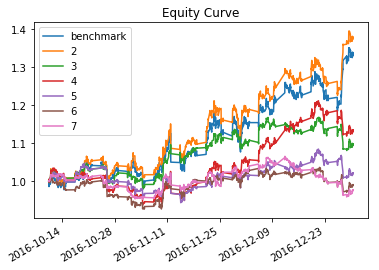

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.362838              0.005538                -0.000520   
1               0.336987              0.001663                -0.011812   
2               0.324059              0.002243                -0.013527   
3               0.368143              0.000444                -0.009051   
4               0.361913             -0.000100                -0.006940   
5               0.373869             -0.000326                -0.006295   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.332779                  0.166129             -0.000520   
1                 0.009368                  0.000749             -0.069804   
2                 0.011221                  0.001538             -0.066165   
3                 0.007108                  0.000111             -0.070758   
4                 0.005838                 -0.000003             -0.057478   
5     

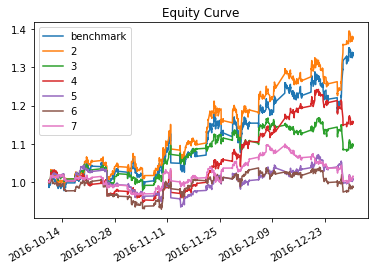

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.362838              0.005538                -0.000520   
1               0.336987              0.001663                -0.011812   
2               0.334157              0.002568                -0.011568   
3               0.370034              0.000216                -0.008692   
4               0.360984             -0.000132                -0.006926   
5               0.379131              0.000302                -0.006143   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.332779                  0.166129             -0.000520   
1                 0.009368                  0.000749             -0.069804   
2                 0.010071                  0.001465             -0.066165   
3                 0.006865                  0.000056             -0.070758   
4                 0.005835                 -0.000009             -0.057478   
5     

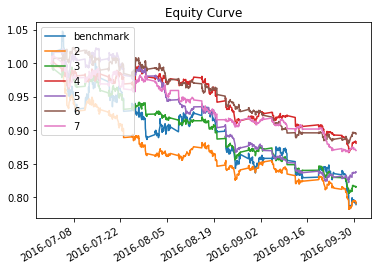

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.244254             -0.003622                -0.008317   
1               0.243064             -0.003145                -0.007142   
2               0.252885             -0.001949                -0.005889   
3               0.260057             -0.002735                -0.005447   
4               0.273967             -0.001715                -0.005249   
5               0.265387             -0.002155                -0.005644   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003815                 -0.001267             -0.064012   
1                 0.004273                 -0.000931             -0.052978   
2                 0.003867                 -0.000415             -0.047062   
3                 0.003959                 -0.000499             -0.035084   
4                 0.004362                 -0.000324             -0.036224   
5     

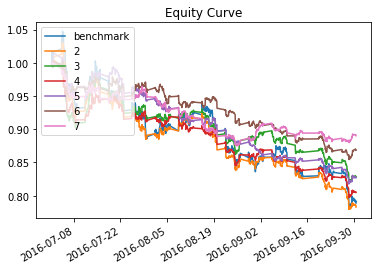

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.246932             -0.003765                -0.120465   
1               0.270136             -0.002891                -0.013059   
2               0.260895             -0.003347                -0.011497   
3               0.261511             -0.002932                -0.008160   
4               0.266754             -0.002171                -0.006982   
5               0.259089             -0.001786                -0.006697   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.120465             -0.240409   
1                 0.005795                 -0.002134             -0.079637   
2                 0.005614                 -0.002249             -0.061030   
3                 0.005692                 -0.001298             -0.062346   
4                 0.004954                 -0.000716             -0.047717   
5     

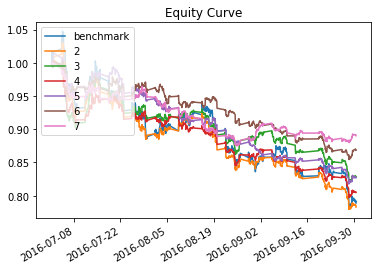

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.246932             -0.003765                -0.120465   
1               0.270136             -0.002891                -0.013059   
2               0.260895             -0.003347                -0.011497   
3               0.261511             -0.002932                -0.008160   
4               0.266754             -0.002171                -0.006982   
5               0.259089             -0.001786                -0.006697   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.120465             -0.240409   
1                 0.005795                 -0.002134             -0.079637   
2                 0.005614                 -0.002249             -0.061030   
3                 0.005692                 -0.001298             -0.062346   
4                 0.004954                 -0.000716             -0.047717   
5     

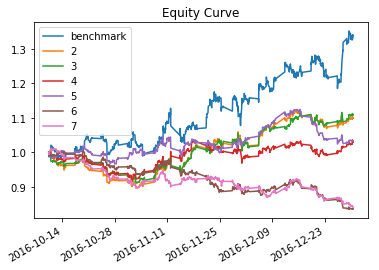

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.326729              0.001676                -0.009575   
1               0.332160              0.001814                -0.009607   
2               0.330963              0.000566                -0.008435   
3               0.331569              0.000619                -0.006974   
4               0.357132             -0.002939                -0.007172   
5               0.378584             -0.002844                -0.007710   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.007118                  0.000520             -0.052492   
1                 0.007087                  0.000511             -0.055101   
2                 0.005772                  0.000114             -0.053571   
3                 0.005727                  0.000123             -0.068216   
4                 0.005837                 -0.000518             -0.065431   
5     

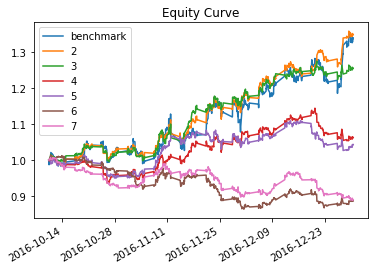

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.360529              0.005126                -0.000520   
1               0.331116              0.003893                -0.014781   
2               0.346596              0.001107                -0.013841   
3               0.349788              0.000782                -0.011051   
4               0.363609             -0.001966                -0.009970   
5               0.349292             -0.001911                -0.009068   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.308107                  0.153794             -0.000520   
1                 0.011094                  0.002597             -0.053173   
2                 0.012904                  0.000921             -0.073507   
3                 0.010746                  0.000381             -0.056085   
4                 0.008000                 -0.000657             -0.075842   
5     

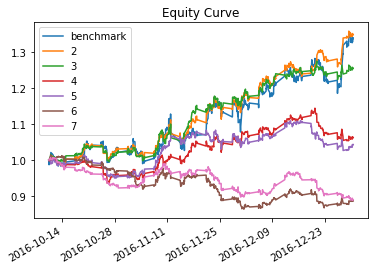

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.360529              0.005126                -0.000520   
1               0.331116              0.003893                -0.014781   
2               0.346596              0.001107                -0.013841   
3               0.349788              0.000782                -0.011051   
4               0.363609             -0.001966                -0.009970   
5               0.349292             -0.001911                -0.009068   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.308107                  0.153794             -0.000520   
1                 0.011094                  0.002597             -0.053173   
2                 0.012904                  0.000921             -0.073507   
3                 0.010746                  0.000381             -0.056085   
4                 0.008000                 -0.000657             -0.075842   
5     

In [3]:
#zn
import matplotlib.pyplot as plt

prod = 'bu'
freq_set =[5, 10, 15, 30]
pct_th_bps_set = [0, 5, 10]
slm_th_type_set = [1, 2, 3]

for pct_th_bps in pct_th_bps_set:
    for freq in freq_set:
        print('pct_th='+str(pct_th_bps)+'bps, freq = '+str(freq)+'min')
        filepath = "C:\\Users\\"+which_pc+"\\QishiQR\\Strategy\\"+str(pct_th_bps)+"bps"
        slm = pd.DataFrame()
        for path, dirlist, filelist in os.walk(filepath):
            #print(filelist)
            for filename in fnmatch.filter(filelist, prod+"_*_major_strategy_"+str(freq)+"_*.csv"):
                print(filename)
                data = pd.read_csv(os.path.join(path,filename))
                slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
        
        slm = slm.groupby(['prior']).sum().reset_index()
        slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
        print(slm.tail(3))
        
        for slm_th_type in slm_th_type_set:
            slm_th = SLM(slm, 0.1, th_type = slm_th_type).run()
            lm_validation = LmValidation(slm_th, symbol=prod+'_major', data_dir=r'C:\\Users\\'+which_pc+'\\QishiQR\\Output\\'+str(pct_th_bps)+'bps\\'+prod+'\\'+str(freq)+'min', valid_dir=r'C:\\Users\\'+which_pc+'\\QishiQR\\Validation\\'+prod+'\\'+str(pct_th_bps)+'bps\\'+str(freq)+'min'+'\\type'+str(slm_th_type), 
                                         max_order=7, offsets_average=True, n_offsets=5, tca = 'Fixed')
            lm_validation.run()
        
        for slm_th_type in slm_th_type_set:
            slm_th = SLM(slm, 0.1, th_type = slm_th_type).run()
            lm_validation = LmValidation(slm_th, start='2016-10-1', end='2016-12-31', symbol=prod+'_major', data_dir=r'C:\\Users\\'+which_pc+'\\QishiQR\\Output\\'+str(pct_th_bps)+'bps\\'+prod+'\\'+str(freq)+'min', valid_dir=r'C:\\Users\\'+which_pc+'\\QishiQR\\Validation\\'+prod+'\\'+str(pct_th_bps)+'bps\\'+str(freq)+'min'+'\\type'+str(slm_th_type)+'\\OS', 
                                         max_order=7, offsets_average=True, n_offsets=5, tca = 'Fixed')
            lm_validation.run()

# Summary

In [5]:
#zn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
prod = 'bu'
freq_set =[5, 10, 15, 30]
pct_th_bps_set = [0, 5, 10]
slm_th_type_set = [1, 2, 3]
fig, axarr= plt.subplots(36, 2, figsize = (10, 130))
fig.subplots_adjust(hspace=0.3, wspace=0.05)
img_cnt = 0
for pct_th_bps in pct_th_bps_set:
    for freq in freq_set:
        for slm_th_type in slm_th_type_set:
            valid_dir_IS =r'C:\\Users\\'+which_pc+'\\QishiQR\\Validation\\'+prod+'\\'+str(pct_th_bps)+'bps\\'+str(freq)+'min'+'\\type'+str(slm_th_type)
            valid_dir_OS =r'C:\\Users\\'+which_pc+'\\QishiQR\\Validation\\'+prod+'\\'+str(pct_th_bps)+'bps\\'+str(freq)+'min'+'\\type'+str(slm_th_type)+'\\OS'
            print(valid_dir_IS)
            print(valid_dir_OS)
            img0 = mpimg.imread(valid_dir_IS+'\\performance_'+prod+'_major.png')
            img1 = mpimg.imread(valid_dir_OS+'\\performance_'+prod+'_major.png')
        
            axarr[img_cnt,0].imshow(img0,aspect='auto')
            axarr[img_cnt,0].set_title('prod:'+prod+', price_th:'+str(pct_th_bps)+'bps, freq:'+ str(freq)+'min, slm_th_type:'+str()+', IS')
            axarr[img_cnt,0].axis('off')
            axarr[img_cnt,1].imshow(img1,aspect='auto')
            axarr[img_cnt,1].set_title('prod:'+prod+', price_th:'+str(pct_th_bps)+'bps, freq:'+ str(freq)+'min, slm_th_type:'+str()+', OS')
            axarr[img_cnt,1].axis('off')         
            img_cnt = img_cnt+1

plt.tight_layout()            
fig.savefig(prod+'_all_test.png')


                  

C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\5min\type1
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\5min\type1\OS
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\5min\type2
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\5min\type2\OS
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\5min\type3
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\5min\type3\OS
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\10min\type1
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\10min\type1\OS
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\10min\type2
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\10min\type2\OS
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\10min\type3
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\10min\type3\OS
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\15min\type1
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\15min\type1\OS
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\15min\type2
C:\\Users\